In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [26]:
df = pd.read_csv(r"E:\Jupyter Notebook\Datasets\Traffic Accident Predictor\traffic_accidents.csv")
df

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
0,20,4.3709,2.3049,0.0753,0.7700,1,32.1592,1.1944,29.0857,16.0432
1,11,9.5564,3.2757,0.5452,4.0540,1,47.8623,0.6296,93.1812,8.9108
2,19,7.5879,2.0989,0.6697,0.3450,0,36.4476,2.8584,83.0086,5.5727
3,23,6.3879,4.9188,0.9412,0.4729,0,20.9200,2.1065,81.3159,13.1452
4,23,2.4042,0.1961,0.7393,1.7111,1,37.3780,1.7028,1.4663,0.6961
...,...,...,...,...,...,...,...,...,...,...
8751,27,2.7683,6.9423,0.6604,3.3575,1,30.2001,1.9822,25.8918,11.1542
8752,18,3.2629,1.7275,0.5490,2.8478,1,6.2979,0.8273,29.6403,17.0410
8753,31,2.5621,8.5263,0.2784,3.2826,1,47.9934,2.8239,45.8211,19.2769
8754,10,9.6205,1.4003,0.2719,0.5776,1,28.0782,0.6403,14.7659,3.6364


In [27]:
df.describe()

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
count,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000
mean,20.625400,5.446209,5.013598,0.507557,2.479631,0.694381,24.952034,1.501943,50.697515,12.001447
std,5.228151,2.595933,2.886880,0.287580,1.434957,0.460695,14.433671,0.860790,28.578973,6.867289
min,5.000000,1.000100,0.000500,0.000000,0.000000,0.000000,0.004700,0.000000,1.026700,0.003100
25%,17.000000,3.190900,2.521600,0.260800,1.229850,0.000000,12.307675,0.774225,25.956750,6.050650
50%,21.000000,5.428500,5.023450,0.509250,2.484300,1.000000,25.009100,1.496950,51.279950,12.013700
75%,24.000000,7.675675,7.543050,0.752125,3.695100,1.000000,37.448300,2.248625,75.714075,17.951825
max,35.000000,9.997500,9.999200,0.999900,4.998900,1.000000,49.997800,2.999800,99.962300,23.997000


In [28]:
df.isna().sum()

accidents              0
traffic_fine_amount    0
traffic_density        0
traffic_lights         0
pavement_quality       0
urban_area             0
average_speed          0
rain_intensity         0
vehicle_count          0
time_of_day            0
dtype: int64

In [41]:
x = df.drop(['accidents'], axis=1)
y = df['accidents']

In [30]:
for col in x.columns:
    x[col] = df[col]/max(df[col])
x

,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
0,0.437199,0.230508,0.075308,0.154034,1.0,0.643212,0.398160,0.290967,0.668550
1,0.955879,0.327596,0.545255,0.810978,1.0,0.957288,0.209881,0.932163,0.371330
2,0.758980,0.209907,0.669767,0.069015,0.0,0.728984,0.952864,0.830399,0.232225
3,0.638950,0.491919,0.941294,0.094601,0.0,0.418418,0.702213,0.813466,0.547785
4,0.240480,0.019612,0.739374,0.342295,1.0,0.747593,0.567638,0.014669,0.029008
...,...,...,...,...,...,...,...,...,...
8751,0.276899,0.694286,0.660466,0.671648,1.0,0.604029,0.660777,0.259016,0.464816
8752,0.326372,0.172764,0.549055,0.569685,1.0,0.125964,0.275785,0.296515,0.710130
8753,0.256274,0.852698,0.278428,0.656664,1.0,0.959910,0.941363,0.458384,0.803305
8754,0.962291,0.140041,0.271927,0.115545,1.0,0.561589,0.213448,0.147715,0.151536


In [44]:
y

0       20
1       11
2       19
3       23
4       23
        ..
8751    27
8752    18
8753    31
8754    10
8755    12
Name: accidents, Length: 8756, dtype: int64

In [38]:
df.dtypes

accidents                int64
traffic_fine_amount    float64
traffic_density        float64
traffic_lights         float64
pavement_quality       float64
urban_area               int64
average_speed          float64
rain_intensity         float64
vehicle_count          float64
time_of_day            float64
dtype: object

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [56]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(36, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
206/206 [==============================] - 2s 4ms/step - loss: 0.0632 - mean_absolute_error: 0.1832
Epoch 2/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0906
Epoch 3/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0764
Epoch 4/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0680
Epoch 5/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0632
Epoch 6/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0595
Epoch 7/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0567
Epoch 8/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0535
Epoch 9/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0043 - mean_absolute_error:

206/206 [==============================] - 1s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0346
Epoch 74/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0340
Epoch 75/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0342
Epoch 76/100
206/206 [==============================] - 1s 3ms/step - loss: 0.0020 - mean_absolute_error: 0.0348
Epoch 77/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0342
Epoch 78/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0332
Epoch 79/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0345
Epoch 80/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0348
Epoch 81/100
206/206 [==============================] - 1s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0

In [57]:
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

69/69 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_absolute_error: 0.0311
Test Loss: 0.0014802837977185845, Test MAE: 0.031075067818164825


In [58]:
y_pred = model.predict(x_test)

69/69 [==============================] - 0s 2ms/step


In [73]:
diff_mean = []
y_test = y_test.reset_index(drop= True)
for i in range(len(y_test)):
    print(f"True answer is {y_test[i]*max(df.accidents)}. Model Predicted answer is {y_pred[i][0]*max(df.accidents)}")
    diff = y_test[i]-y_pred[i][0]
    diff_mean.append(diff)
    
print(f"Total Mean is {sum(diff_mean)/len(diff_mean)}")

True answer is 15.0. Model Predicted answer is 15.61008483171463
True answer is 32.0. Model Predicted answer is 28.578683137893677
True answer is 11.0. Model Predicted answer is 13.458053767681122
True answer is 14.0. Model Predicted answer is 15.349413603544235
True answer is 18.0. Model Predicted answer is 18.863474130630493
True answer is 30.0. Model Predicted answer is 27.58450150489807
True answer is 17.0. Model Predicted answer is 18.82779449224472
True answer is 10.0. Model Predicted answer is 11.885040253400803
True answer is 18.0. Model Predicted answer is 18.09178799390793
True answer is 25.0. Model Predicted answer is 23.8817298412323
True answer is 17.0. Model Predicted answer is 15.32104179263115
True answer is 18.0. Model Predicted answer is 20.125600397586823
True answer is 22.0. Model Predicted answer is 21.592775583267212
True answer is 23.0. Model Predicted answer is 22.815855145454407
True answer is 17.0. Model Predicted answer is 18.620780408382416
True answer is 22

True answer is 20.0. Model Predicted answer is 21.014731228351593
True answer is 18.0. Model Predicted answer is 17.438229769468307
True answer is 19.0. Model Predicted answer is 21.61465734243393
True answer is 14.0. Model Predicted answer is 14.456000924110413
True answer is 15.0. Model Predicted answer is 15.41505366563797
True answer is 19.0. Model Predicted answer is 20.27496337890625
True answer is 25.0. Model Predicted answer is 25.56678593158722
True answer is 14.0. Model Predicted answer is 15.75895756483078
True answer is 33.0. Model Predicted answer is 32.185697853565216
True answer is 23.0. Model Predicted answer is 23.047014474868774
True answer is 27.0. Model Predicted answer is 25.6925106048584
True answer is 20.0. Model Predicted answer is 21.516830921173096
True answer is 29.000000000000004. Model Predicted answer is 26.430160999298096
True answer is 17.0. Model Predicted answer is 17.34270751476288
True answer is 26.0. Model Predicted answer is 24.186937510967255
True

True answer is 27.0. Model Predicted answer is 25.686615109443665
True answer is 15.0. Model Predicted answer is 14.399986416101456
True answer is 11.0. Model Predicted answer is 12.496891915798187
True answer is 21.0. Model Predicted answer is 20.81155776977539
True answer is 19.0. Model Predicted answer is 20.35976380109787
True answer is 19.0. Model Predicted answer is 19.864869713783264
True answer is 20.0. Model Predicted answer is 20.503126978874207
True answer is 14.0. Model Predicted answer is 16.565200984477997
True answer is 16.0. Model Predicted answer is 18.463769555091858
True answer is 21.0. Model Predicted answer is 21.913195550441742
True answer is 17.0. Model Predicted answer is 18.622092604637146
True answer is 11.0. Model Predicted answer is 12.929428517818451
True answer is 12.0. Model Predicted answer is 13.224282562732697
True answer is 17.0. Model Predicted answer is 19.776481091976166
True answer is 25.0. Model Predicted answer is 24.00329053401947
True answer i

True answer is 30.0. Model Predicted answer is 27.09308087825775
True answer is 24.0. Model Predicted answer is 23.85499358177185
True answer is 20.0. Model Predicted answer is 22.13150829076767
True answer is 30.0. Model Predicted answer is 27.999735474586487
True answer is 21.0. Model Predicted answer is 20.710904598236084
True answer is 14.0. Model Predicted answer is 16.385217308998108
True answer is 25.0. Model Predicted answer is 23.8817298412323
True answer is 27.0. Model Predicted answer is 26.98301911354065
True answer is 15.0. Model Predicted answer is 15.761601775884628
True answer is 18.0. Model Predicted answer is 17.67404019832611
True answer is 29.000000000000004. Model Predicted answer is 27.730908393859863
True answer is 23.0. Model Predicted answer is 23.8817298412323
True answer is 17.0. Model Predicted answer is 18.411634266376495
True answer is 22.0. Model Predicted answer is 22.653109431266785
True answer is 24.0. Model Predicted answer is 23.8817298412323
True an

True answer is 15.0. Model Predicted answer is 16.20115101337433
True answer is 19.0. Model Predicted answer is 20.190569758415222
True answer is 30.0. Model Predicted answer is 27.952285706996918
True answer is 22.0. Model Predicted answer is 22.345077097415924
True answer is 22.0. Model Predicted answer is 22.127085626125336
True answer is 13.0. Model Predicted answer is 13.97317111492157
True answer is 17.0. Model Predicted answer is 17.107302844524384
True answer is 16.0. Model Predicted answer is 17.734495103359222
True answer is 18.0. Model Predicted answer is 18.566704988479614
True answer is 27.0. Model Predicted answer is 25.046903789043427
True answer is 23.0. Model Predicted answer is 21.83597207069397
True answer is 19.0. Model Predicted answer is 19.049774706363678
True answer is 17.0. Model Predicted answer is 17.55501002073288
True answer is 13.0. Model Predicted answer is 15.20655944943428
True answer is 14.0. Model Predicted answer is 15.315119177103043
True answer is 

True answer is 27.0. Model Predicted answer is 25.984114408493042
True answer is 23.0. Model Predicted answer is 22.47253954410553
True answer is 25.0. Model Predicted answer is 24.292977154254913
True answer is 13.0. Model Predicted answer is 12.593560516834259
True answer is 18.0. Model Predicted answer is 17.520886659622192
True answer is 29.000000000000004. Model Predicted answer is 27.911102771759033
True answer is 26.0. Model Predicted answer is 25.10228306055069
True answer is 11.0. Model Predicted answer is 11.569861769676208
True answer is 19.0. Model Predicted answer is 19.4075745344162
True answer is 13.0. Model Predicted answer is 14.253862202167511
True answer is 23.0. Model Predicted answer is 21.969638764858246
True answer is 15.0. Model Predicted answer is 15.645472407341003
True answer is 29.000000000000004. Model Predicted answer is 28.119677305221558
True answer is 26.0. Model Predicted answer is 25.488538146018982
True answer is 28.0. Model Predicted answer is 27.72

True answer is 24.0. Model Predicted answer is 24.4175586104393
True answer is 17.0. Model Predicted answer is 16.72040730714798
True answer is 19.0. Model Predicted answer is 20.04408359527588
True answer is 19.0. Model Predicted answer is 20.59396892786026
True answer is 26.0. Model Predicted answer is 24.768866300582886
True answer is 30.0. Model Predicted answer is 27.464430332183838
True answer is 21.0. Model Predicted answer is 20.852093994617462
True answer is 18.0. Model Predicted answer is 18.190073370933533
True answer is 32.0. Model Predicted answer is 30.29179811477661
True answer is 21.0. Model Predicted answer is 22.013573348522186
True answer is 22.0. Model Predicted answer is 20.57840406894684
True answer is 32.0. Model Predicted answer is 30.601190626621246
True answer is 21.0. Model Predicted answer is 22.281755805015564
True answer is 18.0. Model Predicted answer is 17.883870601654053
True answer is 20.0. Model Predicted answer is 20.58886617422104
True answer is 17.

True answer is 25.0. Model Predicted answer is 23.86515736579895
True answer is 15.0. Model Predicted answer is 14.172355830669403
True answer is 21.0. Model Predicted answer is 21.25805914402008
True answer is 21.0. Model Predicted answer is 22.10891306400299
True answer is 27.0. Model Predicted answer is 25.381543040275574
True answer is 15.0. Model Predicted answer is 15.843262523412704
True answer is 27.0. Model Predicted answer is 25.833505988121033
True answer is 20.0. Model Predicted answer is 22.042022347450256
True answer is 23.0. Model Predicted answer is 22.238067388534546
True answer is 18.0. Model Predicted answer is 20.04988521337509
True answer is 18.0. Model Predicted answer is 19.263522922992706
True answer is 22.0. Model Predicted answer is 23.077518343925476
True answer is 19.0. Model Predicted answer is 19.08202052116394
True answer is 19.0. Model Predicted answer is 18.586972057819366
True answer is 21.0. Model Predicted answer is 22.213554978370667
True answer is 

True answer is 32.0. Model Predicted answer is 29.924139082431793
True answer is 15.0. Model Predicted answer is 14.086785614490509
True answer is 21.0. Model Predicted answer is 21.455827355384827
True answer is 21.0. Model Predicted answer is 22.22227931022644
True answer is 26.0. Model Predicted answer is 25.34279465675354
True answer is 13.0. Model Predicted answer is 13.24940413236618
True answer is 20.0. Model Predicted answer is 21.51199519634247
True answer is 24.0. Model Predicted answer is 22.263994216918945
True answer is 21.0. Model Predicted answer is 21.65344536304474
True answer is 22.0. Model Predicted answer is 21.976529359817505
True answer is 29.000000000000004. Model Predicted answer is 27.76267647743225
True answer is 18.0. Model Predicted answer is 17.996846735477448
True answer is 13.0. Model Predicted answer is 12.908041179180145
True answer is 30.0. Model Predicted answer is 27.937997579574585
True answer is 17.0. Model Predicted answer is 17.85597026348114
Tru

True answer is 18.0. Model Predicted answer is 21.073166728019714
True answer is 18.0. Model Predicted answer is 18.415710628032684
True answer is 18.0. Model Predicted answer is 18.731624484062195
True answer is 26.0. Model Predicted answer is 26.35661542415619
True answer is 21.0. Model Predicted answer is 22.115369737148285
True answer is 14.0. Model Predicted answer is 14.640363454818726
True answer is 24.0. Model Predicted answer is 23.8817298412323
True answer is 16.0. Model Predicted answer is 16.66898027062416
True answer is 22.0. Model Predicted answer is 23.8817298412323
True answer is 21.0. Model Predicted answer is 20.8652263879776
True answer is 22.0. Model Predicted answer is 20.967323184013367
True answer is 14.0. Model Predicted answer is 16.588425189256668
True answer is 17.0. Model Predicted answer is 19.231489896774292
True answer is 15.0. Model Predicted answer is 15.142354667186737
True answer is 21.0. Model Predicted answer is 22.003906071186066
True answer is 28.

True answer is 27.0. Model Predicted answer is 25.346040725708008
True answer is 23.0. Model Predicted answer is 22.24448025226593
True answer is 25.0. Model Predicted answer is 23.909342288970947
True answer is 18.0. Model Predicted answer is 18.252906501293182
True answer is 24.0. Model Predicted answer is 24.01701956987381
True answer is 27.0. Model Predicted answer is 24.920217394828796
True answer is 21.0. Model Predicted answer is 21.389773190021515
True answer is 29.000000000000004. Model Predicted answer is 25.594291985034943
True answer is 17.0. Model Predicted answer is 16.267802864313126
True answer is 21.0. Model Predicted answer is 22.54184603691101
True answer is 20.0. Model Predicted answer is 22.074445486068726
True answer is 17.0. Model Predicted answer is 17.668632864952087
True answer is 13.0. Model Predicted answer is 13.829463720321655
True answer is 22.0. Model Predicted answer is 22.40840882062912
True answer is 15.0. Model Predicted answer is 15.982754826545715


True answer is 25.0. Model Predicted answer is 25.65191388130188
True answer is 23.0. Model Predicted answer is 23.8817298412323
True answer is 21.0. Model Predicted answer is 22.209829092025757
True answer is 23.0. Model Predicted answer is 23.87757420539856
True answer is 20.0. Model Predicted answer is 19.92783635854721
True answer is 21.0. Model Predicted answer is 21.605766117572784
True answer is 13.0. Model Predicted answer is 14.75585550069809
True answer is 26.0. Model Predicted answer is 25.718061923980713
True answer is 24.0. Model Predicted answer is 22.239089608192444
True answer is 19.0. Model Predicted answer is 21.888282597064972
True answer is 21.0. Model Predicted answer is 21.653628945350647
True answer is 26.0. Model Predicted answer is 25.24707317352295
True answer is 23.0. Model Predicted answer is 24.72275584936142
True answer is 29.000000000000004. Model Predicted answer is 27.931150794029236
True answer is 21.0. Model Predicted answer is 22.16245859861374
True 

True answer is 26.0. Model Predicted answer is 23.8817298412323
True answer is 14.0. Model Predicted answer is 14.734741449356079
True answer is 13.0. Model Predicted answer is 15.03068134188652
True answer is 17.0. Model Predicted answer is 19.280001521110535
True answer is 15.0. Model Predicted answer is 15.207667201757431
True answer is 20.0. Model Predicted answer is 21.087855398654938
True answer is 24.0. Model Predicted answer is 24.31052803993225
True answer is 15.0. Model Predicted answer is 15.097672194242477
True answer is 17.0. Model Predicted answer is 18.218103051185608
True answer is 17.0. Model Predicted answer is 17.959183156490326
True answer is 14.0. Model Predicted answer is 15.234042555093765
True answer is 16.0. Model Predicted answer is 15.359258204698563
True answer is 16.0. Model Predicted answer is 15.738447457551956
True answer is 26.0. Model Predicted answer is 24.658671021461487
True answer is 21.0. Model Predicted answer is 20.607009530067444
True answer is

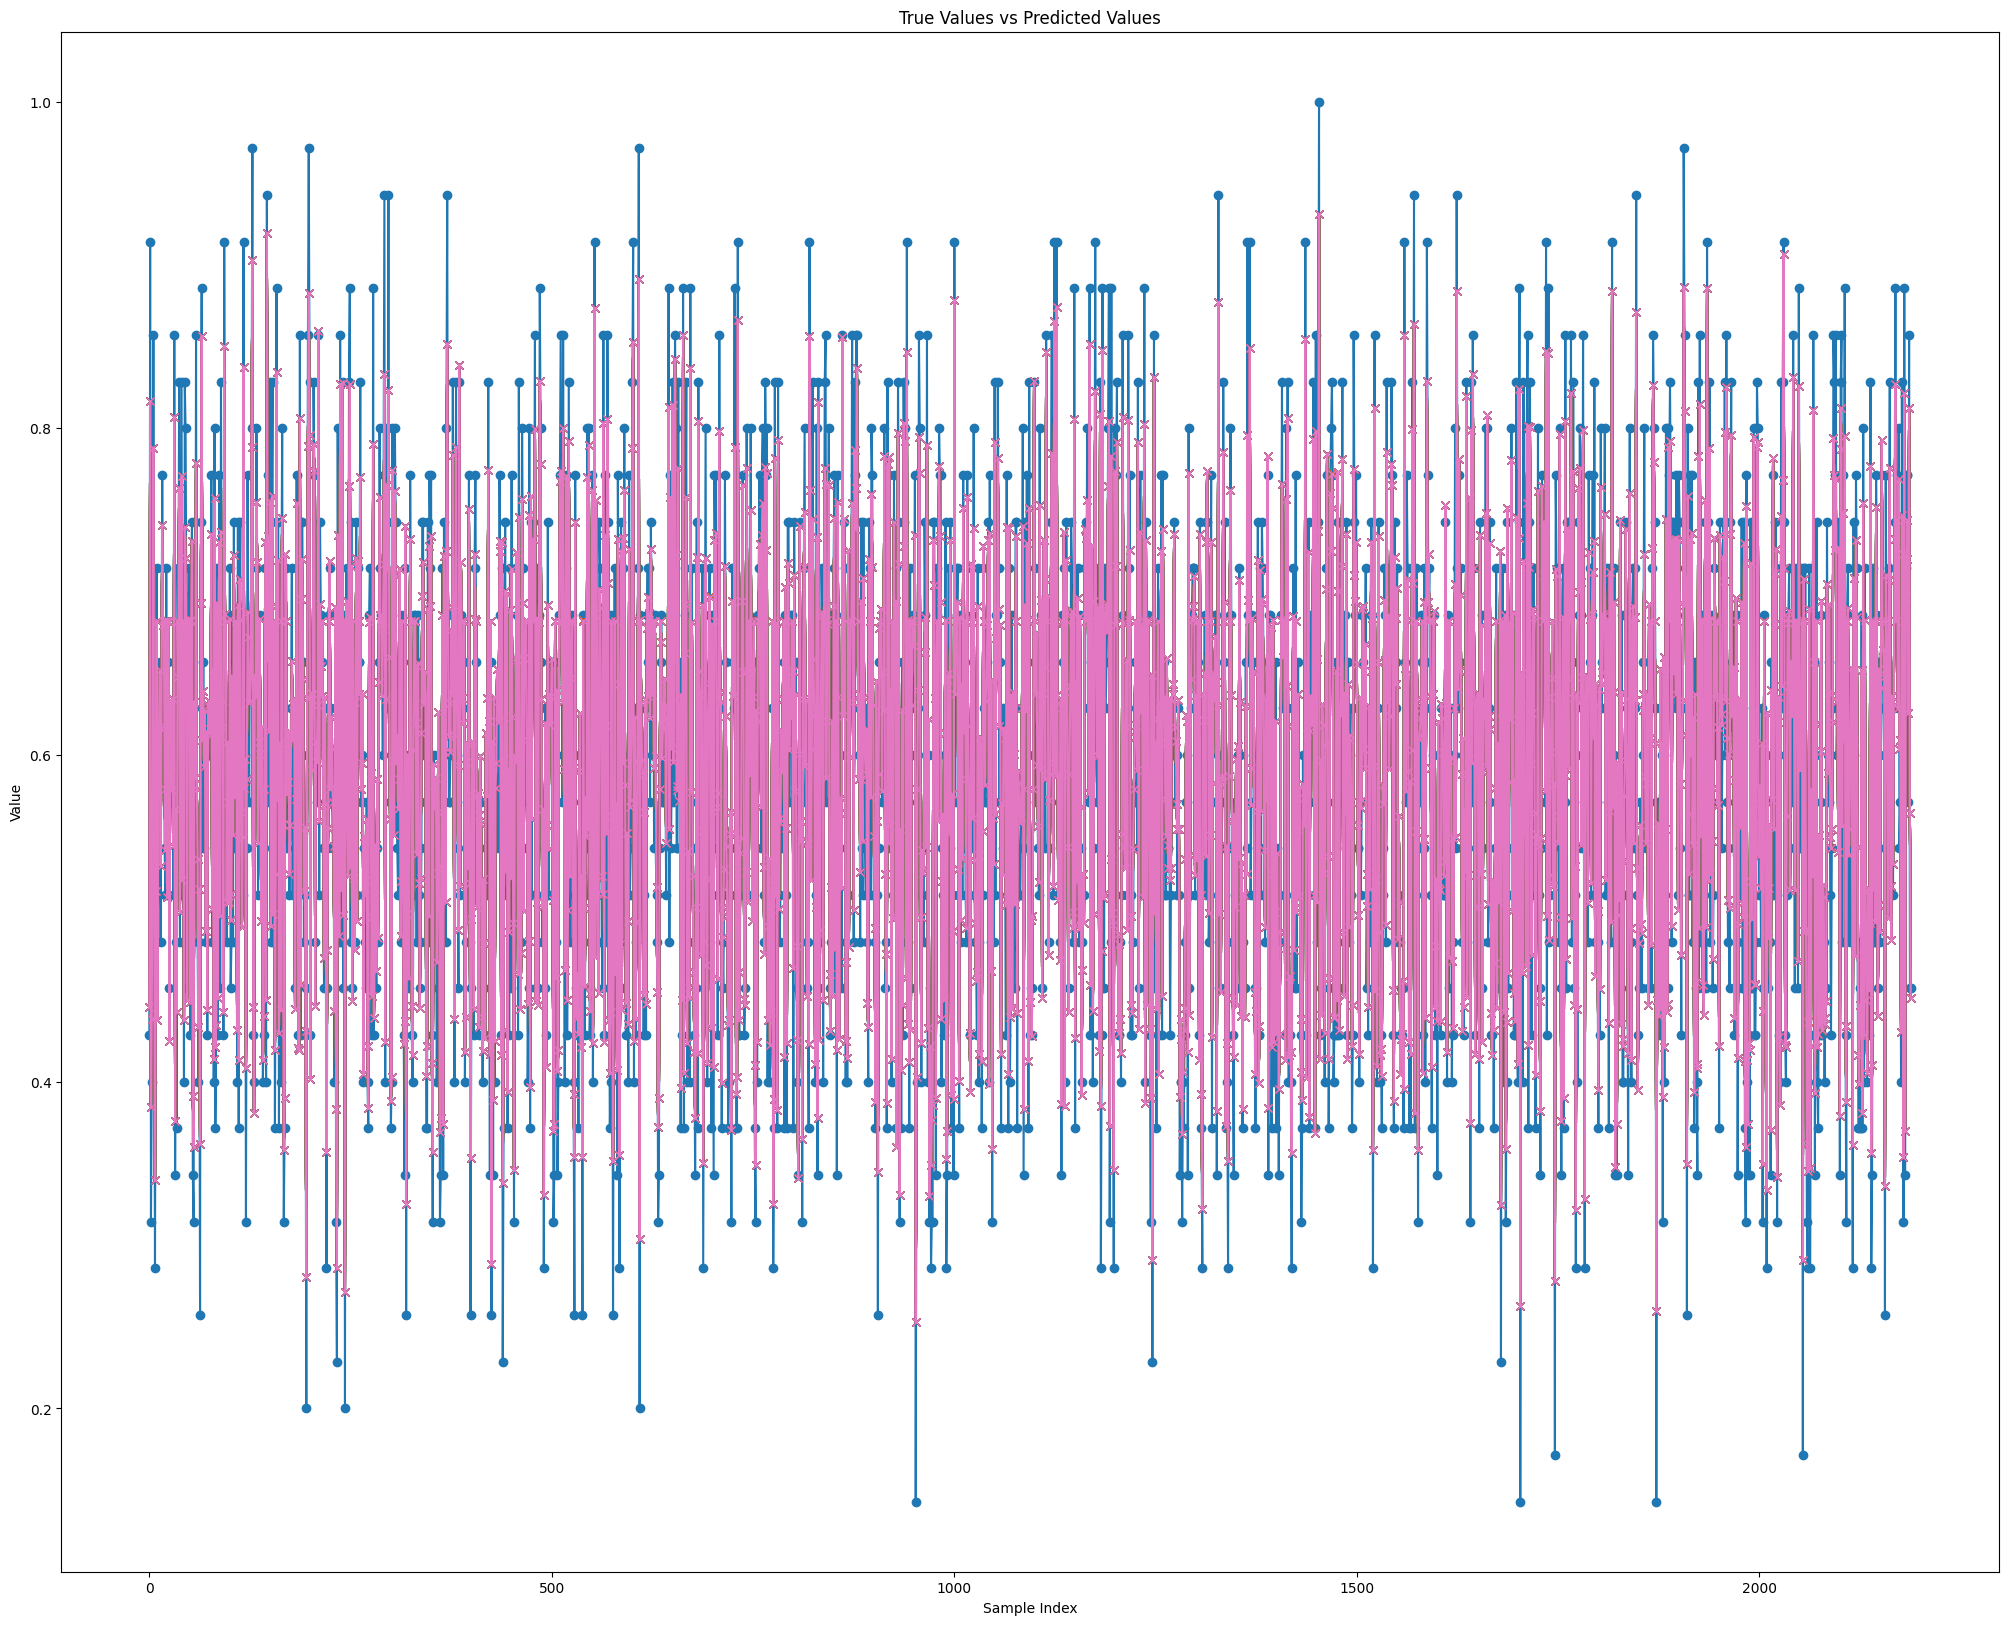

In [74]:
plt.figure(figsize=(25, 20))
plt.plot(y_test, label='True Values', marker='o')  # Plot first 100 true values
plt.plot(y_pred, label='Predicted Values', marker='x')  # Plot first 100 predictions
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True Values vs Predicted Values')
plt.show()

In [64]:
len(pred_val)

36

In [65]:
len(y_test)

2189

In [66]:
for val in pred_val:
    print(val)

0.4513779
0.4513767
0.45137846
0.4513769
0.4513752
0.45137987
0.45137954
0.4513798
0.45137578
0.45137575
0.45137995
0.4513803
0.45137966
0.45137683
0.45137626
0.45137525
0.45137995
0.45137927
0.45137766
0.45137703
0.45137644
0.4513781
0.45137954
0.45137638
0.451376
0.4513788
0.45137587
0.45137662
0.45137593
0.45137528
0.45138013
0.45137638
0.4513759
0.45137593
0.45137575
0.45137656


In [67]:
for val in y_test:
    print(val)

0.42857142857142855
0.9142857142857143
0.3142857142857143
0.4
0.5142857142857142
0.8571428571428571
0.4857142857142857
0.2857142857142857
0.5142857142857142
0.7142857142857143
0.4857142857142857
0.5142857142857142
0.6285714285714286
0.6571428571428571
0.4857142857142857
0.6285714285714286
0.7714285714285715
0.6571428571428571
0.6571428571428571
0.5428571428571428
0.5142857142857142
0.7142857142857143
0.5142857142857142
0.6571428571428571
0.6285714285714286
0.45714285714285713
0.6
0.5714285714285714
0.5714285714285714
0.6
0.5142857142857142
0.8571428571428571
0.34285714285714286
0.4857142857142857
0.37142857142857144
0.7142857142857143
0.6571428571428571
0.8285714285714286
0.4857142857142857
0.6571428571428571
0.8285714285714286
0.5142857142857142
0.6571428571428571
0.4
0.8285714285714286
0.8
0.6857142857142857
0.45714285714285713
0.6285714285714286
0.7142857142857143
0.6285714285714286
0.42857142857142855
0.7142857142857143
0.7428571428571429
0.34285714285714286
0.3142857142857143
0.62